In [179]:
%run difraciones.py #Cargar las librerias

In [180]:
import matplotlib
#matplotlib.use('Qt4Agg')
import matplotlib.pyplot as p
from time import time
#p.switch_backend('QtAgg4')
%matplotlib qt
#Figuras fuera del notebook

Este código requiere importar:
numpy, matplotlib, pandas, time y Jupyter Notebook

Los archivos incluidos son:
difraciones.py --> contiene la libreria (funciones) para ejecutar el simulador
estrellas.dat --> contiene datos propios del tipo espectral de la estrella: luminosidad, temperatura y magnitud absoluta.
listadat.txt --> contiene en forma ordenada el nombre del archivo que describe la convolucion del filtro y la emision espectral de la estrella (Ojo para TAOS-1)
folder "spectra" --> contiene todos los archivos de convoluciones  de la emision estelar y el filtro de TAOS-1 

In [279]:
#Parametros basicos para el calculo
M=2**12 # Tamano de la malla en [px] 2048
lamb=600e-9 # Long de onda en [m]


#Parametros de la observacion (conocidos a Priori)
vE=29800 # velocidad de traslacion de la tierra  en m/s
vr=5000 #velocidad del cuerpo Pos si va en contra de la direccion de la tierra
ang=30 #angulo desde oposicion para calcular velocidad tangencial del objeto
fps=20 #frames por segundo
mV=12 # Magnitud aparente de la estrella
nEst=30 #Seleccion de tipo espectral de estrella
#A0=1;A1=2;A2=3;A3=4;A4=5;A5=6;A7=7;F0=8;F2=9;F3=10;F5=11;F6=12;F7=13;F8=14
#G0=15;G1=16;G2=17;G5=18;G8=19;K0=20;K1=21;K2=22;K3=23;K4=24;K5=25;K7=26;
#M0=27;M1=28;M2=29;M3=30;M4=31;M5=32;M6=33;M7=34;M8=35
nLamb=10 # Num de longitudes de onda a considerar para el calculo espectral spectra()


#Parametros del evento de ocultacion (desconocidos) incluir d
d=3000 # Diam del objeto en [m]
ua=45 #Distancia del objeto en unidades astronómicas
D=calc_plano(d,lamb,ua) #Tamano del plano total en [m]
toffset=0 #en pixeles
T=0 # direccion de lectura en grados
b=0 # Parametro de impacto en metros

In [38]:
D

126814.825631706

CALCULOS INICIALES PARA DEFINIR OBJETOS Y SU PATRON DE DIFRACCION BASICO

In [280]:
inicio=time()
#Definiendo objetos
O1=pupilCO(M,D,d) #Objeto 1: circular
O2=pupil_doble(M,D,d) #Objeto 2: contact binary
z=1.496e11*ua #Distancia del objeto en [m]
I1=fresnel(O1,M,D,z,lamb) #Patron 1 de difraccion monocromatico con fuente puntual
I2=fresnel(O2,M,D,z,lamb) #Patron 2 de difraccion monocromatico con fuente puntual
#I0=add_ruido(I0,mV)
time()-inicio

5.932967662811279

In [ ]:

GRAFICAR RESULTADOS

In [281]:
#Objeto Circular
Lims=20 #lims in km
p.figure(1)
p.clf()
#Ojo el tamaño del plano es D, va de -D/2 hasta D/2
#en km debe ser -D/2000  hasta D/2000
p.imshow(O1,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-2*d/1000,2*d/1000])
p.ylim([-2*d/1000,2*d/1000])
p.gray()
p.title('Circular Object')

p.figure(2)
p.clf()
p.imshow(I1,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Diffraction pattern, circular object')

#Objeto no circular
p.figure(3)
p.clf()
p.imshow(O2,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-2*d/1000,2*d/1000])
p.ylim([-2*d/1000,2*d/1000])
p.gray()
p.title('Contact binary')

p.figure(4)
p.clf()
p.imshow(I2,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Diffraction pattern, contact binary')

Text(0.5, 1.0, 'Diffraction pattern, contact binary')

In [17]:
p.show()

In [289]:
#CALCULAR PATRON CON CONTRIBUCION ESPECTRAL y GRAFICAR
inicio=time()
z=1.496e11*ua #Distancia del objeto en [m]
I1s=spectra(O1,M,D,z,nEst,nLamb)#Esta funcion calcula el patron cromatico
I2s=spectra(O2,M,D,z,nEst,nLamb)#binary

time()-inicio

49.32372069358826

In [283]:
tipo,R_star=calc_rstar(mV,nEst,ua)#Funcion para calcular el radio y tipo de la estrella usa estrellas.dat
p.figure(5)
p.clf()
p.imshow(I1s,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Chromatic diffraction pattern, circular: '+tipo+', Longs. Onda: '+np.str(np.round(nLamb))) 

p.figure(6)
p.clf()
p.imshow(I2s,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Chromatic diffraction pattern, binary: '+tipo+', Longs. Onda: '+np.str(np.round(nLamb)))
#time()-inicio
#print(D)
#np.save('CB_D3_pattern_D142112.npy', I1s)

Text(0.5, 1.0, 'Chromatic diffraction pattern, binary: M3, Longs. Onda: 10')

In [290]:
#CALCULAR PATRON PARA FUENTE EXTENDIDA
inicio=time()
z=1.496e11*ua #Distancia del objeto en [m]
tipo,R_star=calc_rstar(mV,nEst,ua)#Funcion para calcular el radio de la estrella usa estrellas.dat
I1f=promedio_PD(I1s,R_star,D,M,d) #Funcion para calcular contribucion de fuente extendida
I2f=promedio_PD(I2s,R_star,D,M,d) #Binario
time()-inicio

12.525768041610718

In [229]:
calc_rstar(mV,nEst,ua)

('G0', 132.26158688688528)

In [287]:
%run difraciones.py

In [285]:
p.figure(7)
p.clf()
p.imshow(I1f,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Finite source pattern, circular: '+tipo+', Radio estrella: '+np.str((R_star/1000))+'[km]') 
p.figure(8)
p.clf()
p.imshow(I2f,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Finite source pattern, binary: '+tipo+', Radio estrella: '+np.str((R_star/1000))+'[km]') 

time()-inicio
#np.save('CIRCULAR_D3_pattern_D%d.npy'%D, I1s)

12.68929648399353

In [ ]:
#AGREGAR RUIDO DE POISSON
inicio=time()
snr=SNR_TAOS2(mV)#Calcular senal a ruido segun TAOS-2
I1n=add_ruido(I1f,mV) # Obtener patron de difraccion con ruido 
I2n=add_ruido(I2f,mV)

In [109]:
p.figure(9)
p.clf()
p.imshow(I1n,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Diffraction pattern, circular, noise mV: '+np.str(mV)+', SNR: '+np.str(np.round(snr)))
p.figure(10)
p.clf()
p.imshow(I2n,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.xlim([-Lims,Lims])
p.ylim([-Lims,Lims])
p.title('Diffraction pattern, binary, noise mV: '+np.str(mV)+', SNR: '+np.str(np.round(snr)))

time()-inicio

149.1583116054535

In [ ]:
dat=pd.DataFrame()
dat.to_csv('diffKMs.csv')

In [291]:
#EXTRAER PERFIL DE DIFRACCION ojo T--> grados y b --> metros
#b = 0
xc,yc=extraer_perfil(I1f,M,D,T,b) #Extraer perfil de difraccion sin ruido
xb,yb=extraer_perfil(I2f,M,D,T,b) #Extraer perfil de difraccion con ruido
p.figure(11)
p.clf()
p.plot(xc/1000,yc)
p.xlim([-Lims,Lims])
#p.xlim([-10/25,10/25])
p.xlabel('Distance [km]')
p.ylabel('Normalized intensity')
p.title('Circular diffraction profile')
p.figure(12)
p.clf()
p.plot(xb/1000,yb)
p.xlim([-Lims,Lims])
p.xlabel('Distance [km]')
p.ylabel('Normalized intensity')
p.title('Binary diffraction profile')

Text(0.5, 1.0, 'Binary diffraction profile')

142112.63138792414 5000 20 2 29800 0 45


Text(0, 0.5, 'Normalized intensity')

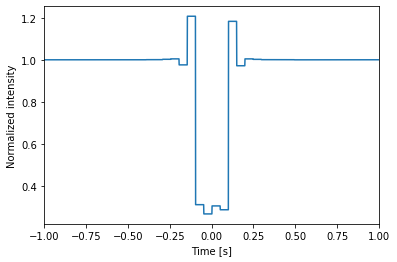

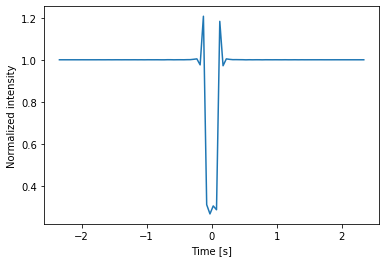

In [25]:
#MUESTREAR SEGUN PARAMETROS CONOCIDOS DEFINIDOS AL PRINCIPIO
toffset=2
ang=0
print(D,vr,fps,toffset,vE,ang,ua)
x1,y1,x2,y2=muestreos(y,D,vr,fps,toffset,vE,ang,ua) #fUNCION PARA MUESTREAR genera dos tuplas
p.figure(10)
p.clf()
p.plot(x1,y1)
p.xlabel('Time [s]')
p.ylabel('Normalized intensity')
p.xlim([-1,1])
#p.savefig('test.png')
dat=pd.DataFrame(y1,x1)
#dat.to_csv('CB_D10_pattern_b%d.csv'% (b/1000) )

p.figure(11)
p.clf()
p.plot(x2,y2)
p.xlabel('Time [s]')
p.ylabel('Normalized intensity')